In [1]:
#Se importar las librerias necesarias para el desarrollo del algoritmo
!pip install transformers
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
from skimage import io

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted class: killer whale, killer, orca, grampus, sea wolf, Orcinus orca


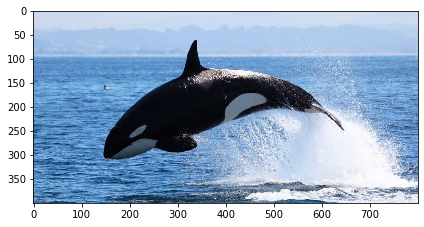

In [2]:
url = input('Ingrese la URL de la imagen')
#Ejemplo de URL https://www.caracteristicas.co/wp-content/uploads/2017/02/orcas-ballenas-min-e1561832386822.jpg
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

from skimage import io
image = io.imread(url)
io.imshow(image)
io.show()